In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

In [ ]:
!ls

 drive	'test-data (1).csv'   train-data.csv   used-cars-price-prediction.zip


This project is based on the Used Cars Price data available from the following Kaggle repository: https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction/data?select=train-data.csv



*   The purpose of this project is to create a program capable of predicting used car mileage based on previous registered data in a csv file.
*   List item



Step 1: Reading the data file in Python.

In order to work with the data, it"s essential to firstly write the Python code that enables the program to read the file and operate with it. In order to do this, the Pandas library will be used to operate with tables, and numpy, as it has several useful tools to operate with data.

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

import pandas as pd
import numpy as np
CarData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test-data.csv", encoding="latin")
print("Shape before eliminating the duplicate values: ", CarData.shape)

# Removing any duplicate rows in order to clean the data utilzing the drop duplicates function.
CarData = CarData.drop_duplicates()
print("Shape after eliminating the duplicate values: ", CarData.shape)

# Printing the sample data after cleanup
CarData.head(10)



Shape before eliminating the duplicate values:  (1234, 13)
Shape after eliminating the duplicate values:  (1234, 13)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
5,5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,NaN
6,6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0,NaN
7,7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN
8,8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,NaN
9,9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,NaN


Key observations from the Data description:



*   The file contains 1234 used car details.

*   There are 12 attributes, and they are described below:

*   Name: The model name and variant of the car
*   Location: The city or region where the car is located
*   Year: The year when the car got manufactured
*   Kilometers_Driven: The amount of kilometers that the car has driven before being put on sale

*   Fuel_Type: The type of fuel that powers the car.
*   Transmission: Indicates if the car has either a manual or automatic transmission.

*   Owner_type: Indicates how many owners the car has been through. "First" if it"s only been with one, "Second" if it"s been through two, and so on.
*   Mileage: The total distance that the vehicle has travelled in kilometers per liter.


*   Engine: The type of engine that powers the vehicle, calculated in Cubic Centimeters.
*   Power: The brake horsepower of the car.

*   Seats: The amount of seats in the car.
*   New price: The original price of the car when it was new.

An interesting point to note is that the "New_Price" column has null values. As such, this attribute will be dropped down in the code below.













In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

import pandas as pd
import numpy as np
CarData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test-data.csv", encoding="latin")

# Code to drop down the New_Price column specifically.
CarData = CarData.drop(columns=["New_Price"])

# We'll remove the text from the numeric data in order to be able to work with it easier.

CarData["Mileage"] = CarData["Mileage"].str.extract("(\d+\.|\d+)").astype(float)

# Remove the text from "Engine" for further use and convert it to float.
CarData["Engine"] = CarData["Engine"].str.replace(" CC", "").astype(float)

# Remove the text from "Power" for further use and convert it to float.
CarData["Power"] = CarData["Power"].str.extract("(\d+\.|\d+)").astype(float)

# After dropping down the New_Price column, we print the data
print("Shape after dropping 'New_Price': ", CarData.shape)

# Printing the sample data after dropping the column
CarData.head(10)

Shape after dropping 'New_Price':  (1234, 12)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.0,998.0,58.0,4.0
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.0,796.0,47.0,5.0
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.0,2393.0,147.0,7.0
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.0,1364.0,NaN,5.0
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.0,1197.0,82.0,5.0
5,5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0,2179.0,140.0,7.0
6,6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.0,2982.0,168.0,7.0
7,7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.0,814.0,55.0,5.0
8,8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0,1497.0,118.0,5.0
9,9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.0,2179.0,140.0,7.0


Step 2: Problem Statement Definition



*   Create a prediction model to predict the mileage of a car
*   In order to make this prediction we will use the following values: Name, year, kilometers_driven, fuel_type, transmission, engine, seats, owner_type



Step 3 : Choosing the appropriate ML/AI Algorithm for Data Analysis

[The target variable is continuous, as they are all numbers. The chosen Machine Learning algorythm for this project will be a Regression model, commonly used for price prediction.](https://)

Step 4: Revising the data from the database and balance it if it"s skewed.



*   The reasoning behind this decision lies itself behind the fact that skewed data will affect the algorithm negatively, and that will lead to inaccurate predictions. As such, we"ll


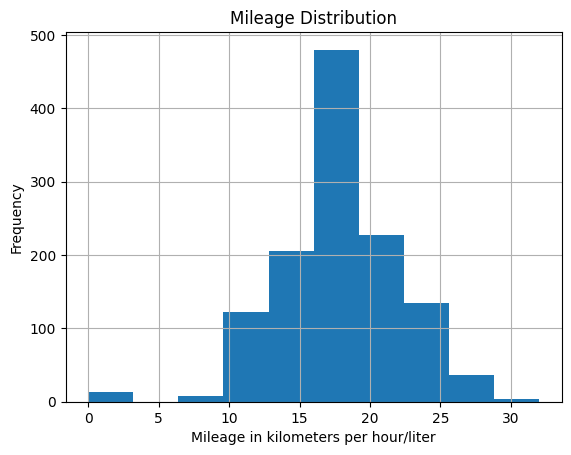

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

%matplotlib inline
import matplotlib.pyplot as plt
# Creating a histogram with the data, as its type is continuous.
# By creating a histogram, this will help understand the distribution of the price

CarData["Mileage"].hist()

# Adding a title and description of the X and Y axis to be more readable.
plt.title("Mileage Distribution")
plt.xlabel("Mileage in kilometers per hour/liter")
plt.ylabel("Frequency")

plt.show()



Observations from Step 4:

*   As we can see from the graph, the distribution does not show any problems, so we can proceed with the project.    
*   There are enough number of rows for each type of values to learn from.



# **Step 5: Basic exploration of the Data Analysis.**
In this step, the overall data will be gauged and anaylised as well as the types of columns, and the volume of the data. This will help identify which columns are Qualitative, Quantitative and Categorical. Plus, this step will start the data cleaning and rejection process. Through this, it"s important to question if certain data is relevant to the project. In this case, question "Is this data truly relevant to predict the mileage of a car?" - If the answer is a clear "No", then the column must be deleted.

In order to proceed, the following commands will be used in order to explore the data.


*   head(): It allows to see a few sample rows of the data.
*   info(): This command shows a summarized information of the data.
*   describe(): Provides descriptive statistical details of the data.
*   nunique(): Finally, this command will help us determine if a column is Categorical or continuous.

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Look at the first sample rows of data.
CarData.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.0,998.0,58.0,4.0
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.0,796.0,47.0,5.0
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.0,2393.0,147.0,7.0
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.0,1364.0,NaN,5.0
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.0,1197.0,82.0,5.0


In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Continue to look at sample rows in the bottom of the data with the tail command.
CarData.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.0,1598.0,103.0,5.0
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.0,1197.0,103.0,5.0
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.0,1461.0,63.0,5.0
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.0,1197.0,103.0,5.0
1233,1233,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0,2148.0,170.0,5.0


In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Now, utilizing the info command we'll determine which columns need to be deleted.
# Data that has too many missing values will be removed.
# Qualitative values will be deleted as they will interfere with the machine
# learning project.

CarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   float64
 9   Engine             1224 non-null   float64
 10  Power              1202 non-null   float64
 11  Seats              1223 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 115.8+ KB


In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Looking at descriptive details of data with the describe command.
CarData.describe(include="all")

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
count,1234.000000,1234,1234,1234.000000,1234.000000,1234,1234,1234,1234.000000,1224.000000,1202.000000,1223.000000
unique,NaN,768,11,NaN,NaN,4,2,4,NaN,NaN,NaN,NaN
top,NaN,Maruti Alto LXi,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN
freq,NaN,9,159,NaN,NaN,647,905,1023,NaN,NaN,NaN,NaN
mean,616.500000,NaN,NaN,2013.400324,58507.288493,NaN,NaN,NaN,17.752836,1593.584967,110.055740,5.284546
std,356.369424,NaN,NaN,3.179700,35598.702098,NaN,NaN,NaN,4.465931,564.347723,51.575392,0.825622
min,0.000000,NaN,NaN,1996.000000,1000.000000,NaN,NaN,NaN,0.000000,624.000000,34.000000,2.000000
25%,308.250000,NaN,NaN,2011.000000,34000.000000,NaN,NaN,NaN,15.000000,1198.000000,75.000000,5.000000
50%,616.500000,NaN,NaN,2014.000000,54572.500000,NaN,NaN,NaN,18.000000,1461.000000,93.000000,5.000000
75%,924.750000,NaN,NaN,2016.000000,75000.000000,NaN,NaN,NaN,21.000000,1968.000000,130.000000,5.000000


In [ ]:
# To understand which column is Categorical and which one is continous.
# If the number of unique values is less than 20, then it"s most likely a Categorical value.
CarData.nunique()


,0
Unnamed: 0,1234
Name,768
Location,11
Year,20
Kilometers_Driven,755
Fuel_Type,4
Transmission,2
Owner_Type,4
Mileage,25
Engine,104


# Step 7: Removing unwanted columns
There are no qualitative columns in the data, as such, no column deletion is required.

# **Step 8: Visual Exploratory Data Analysis**

In this step, the distribution of all Categorical values will be observed utilizing bar plots. Usually, a Categorical value contains less than 20 unique values, AND has data repeating the same values, which means the data can be grouped by those unique values. Based on the previous step, we will use the following categorical predictors:



*   Location
*   Fuel_type
*   Transmission
*   Owner_Type
*   Seats

We will use bar charts to see how data is distributes for these two Categorical values.





In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Plotting multiple bar charts at once for the Categorical variables
# We will define a function to plot multiple bar charts at once.

def PlotBarCharts(inpData, colsToPlot):
  %matplotlib inline
  # Generating multiple subplots

  fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize =(20, 5))
  fig.suptitle("Bar Charts of "+ str(colsToPlot))

  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind="bar", ax=subPlot[plotNumber])

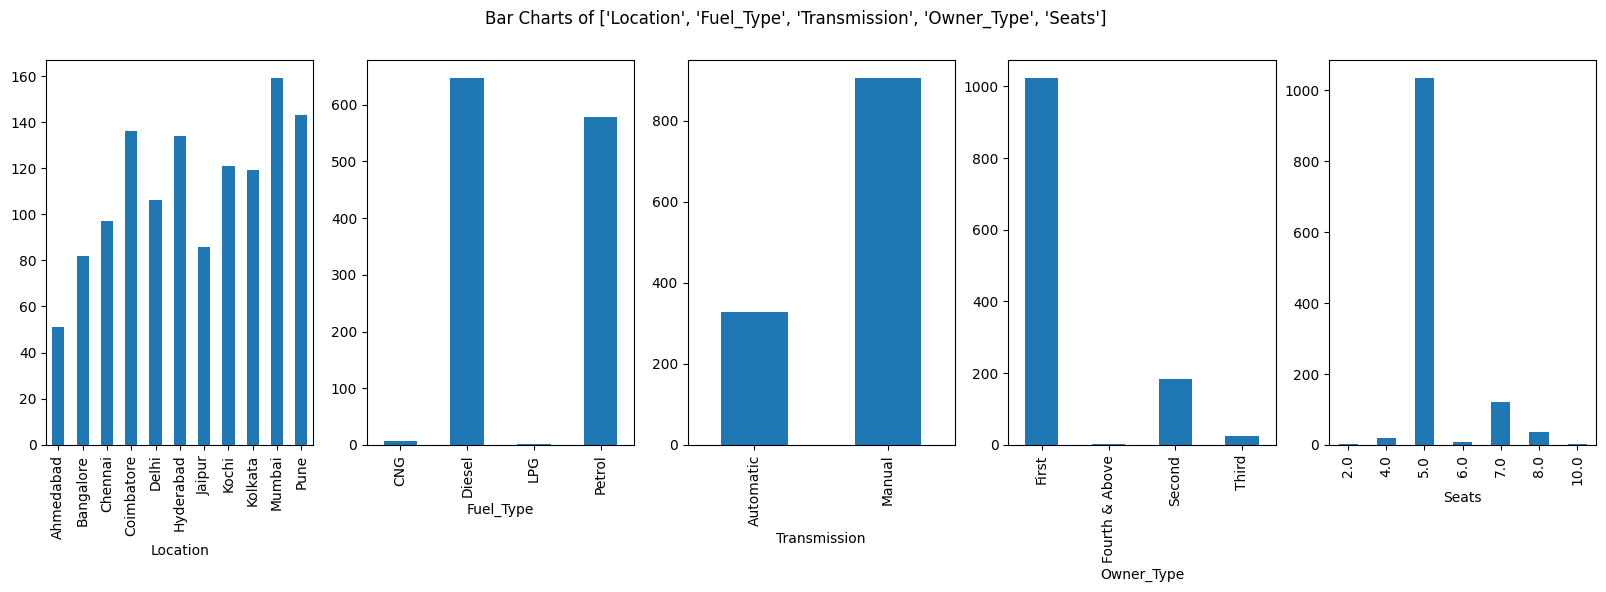

In [ ]:
# Now, we call the function we created.

PlotBarCharts(inpData = CarData, colsToPlot = ["Location", "Fuel_Type", "Transmission", "Owner_Type", "Seats"])

# Observations from Step 8 - Analysis from visual exploratory data

In an ideal barchart, every category has comparable frequencies in the y-axis and the x-axis. That way, the algorithm has enough data to learn.

In this dataset, "Fuel_Type, Transmission, Owner_Type" and "Seats" are skewed. One or two bars are the dominant ones, and the other categories showcase very little numbers.

# Step 9 Visualize distribution of Continous predictor variables in the data utilizing histograms.

Based on the basic exploratory data analysis, there are
five continuous predictor variables. "Year", "Kilometers_Driven", "Mileage", "Engine", and "Power"

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometers_Driven'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Power'}>, <Axes: >]], dtype=object)

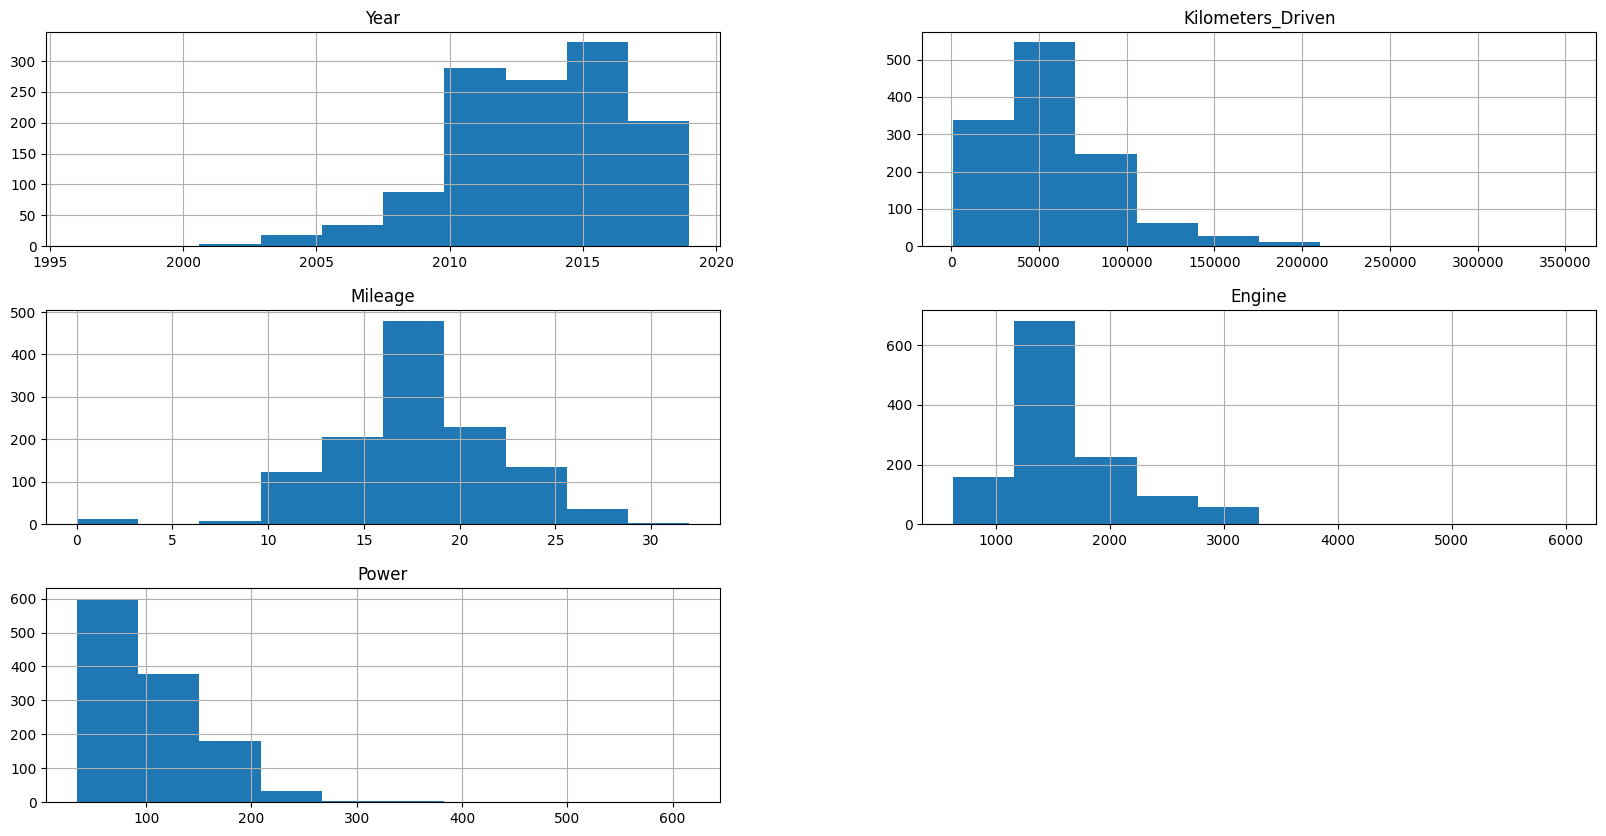

In [ ]:
CarData.hist(["Year", "Kilometers_Driven", "Mileage", "Engine", "Power"], figsize=(20,10))

# Observations from Step 9

Histogram interpretation. The ideal outcome is a bell curve or a slightly skewed bell curve. If there"s too much skewness, outlier removal treatment must be performed, and if that doesn"t resolve the issue, then elimination of the column or data attribute is next.



*   Selected continous variables:
*   Year: Selected. The distribution is good.
*   Kilometers_Driven: Selected. Outliers seem beyond 200.000km, need to treat them.
*   Mileage: Selected. The distribution is good.
*   Engine: Selected. Outliers seem beyond 4000CC, need to treat them.
*   Power: Selected. Outliers seem beyond 400 bhp, need to treat them.









# Step 10: Outlier Analysis.

Outliers are extreme values in the data that are far away from the rest of the values, also called like the "Tails" of a histogram.

Outliers must be treated one column or data attribute at the time, as treatment will be slightly different for each column depending on the values they have.

It"s important to treat outliers as they bias the building of machine learning models. There are two methods of of treating outliers in data:

1.   Deleting the outlier records, only if there are a few values lost.
2.   Input the outlier values with a logical business value.



In [ ]:
# Replacing outliers for Kilometers_Driven
# Finding nearest values to the 200000 mark

CarData["Kilometers_Driven"][CarData["Kilometers_Driven"]<200000].sort_values(ascending=False)

,Kilometers_Driven
223,196000
538,194500
291,194000
1181,190000
1130,183513
...,...
510,1015
195,1001
791,1001
182,1000


The result above shows that the nearest logical value is 196000, as such, we"ll replace any value above 200000 with it.

In [ ]:
#  We replace outliers with the nearest possible value

CarData["Kilometers_Driven"][CarData["Kilometers_Driven"]>200000] = 196000

<ipython-input-14-6dd092eed350>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarData["Kilometers_Driven"][CarData["Kilometers_Driven"]>200000] = 196000


We will continue with the same procedure for the rest of the histograms until all outliers have been treated.

In [ ]:
# Replacing outliers for Engine
# Finding nearest values to the 4000 mark

CarData["Engine"][CarData["Engine"]<4000].sort_values(ascending=False)

,Engine
823,3696.0
167,3498.0
451,2999.0
941,2996.0
193,2993.0
...,...
101,624.0
448,624.0
192,624.0
807,624.0


In [ ]:
#  We replace outliers with the nearest possible value
CarData["Engine"][CarData["Engine"]>4000] = 3696

<ipython-input-16-ccc014cc990d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarData["Engine"][CarData["Engine"]>4000] = 3696


In [ ]:
# Replacing outliers for Power
# Finding nearest values to the 400 mark

CarData["Power"][CarData["Power"]<400].sort_values(ascending=False)

,Power
167,364.0
941,362.0
1098,360.0
823,328.0
1137,321.0
...,...
1083,37.0
670,35.0
101,35.0
389,34.0


In [ ]:
#  We replace outliers with the nearest possible value
CarData["Power"][CarData["Power"]>400] = 364

<ipython-input-18-ae3d5b682eeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarData["Power"][CarData["Power"]>400] = 364


# Step 11: Visualising Data Distribution after removal of outliers

array([[<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Power'}>, <Axes: >]], dtype=object)

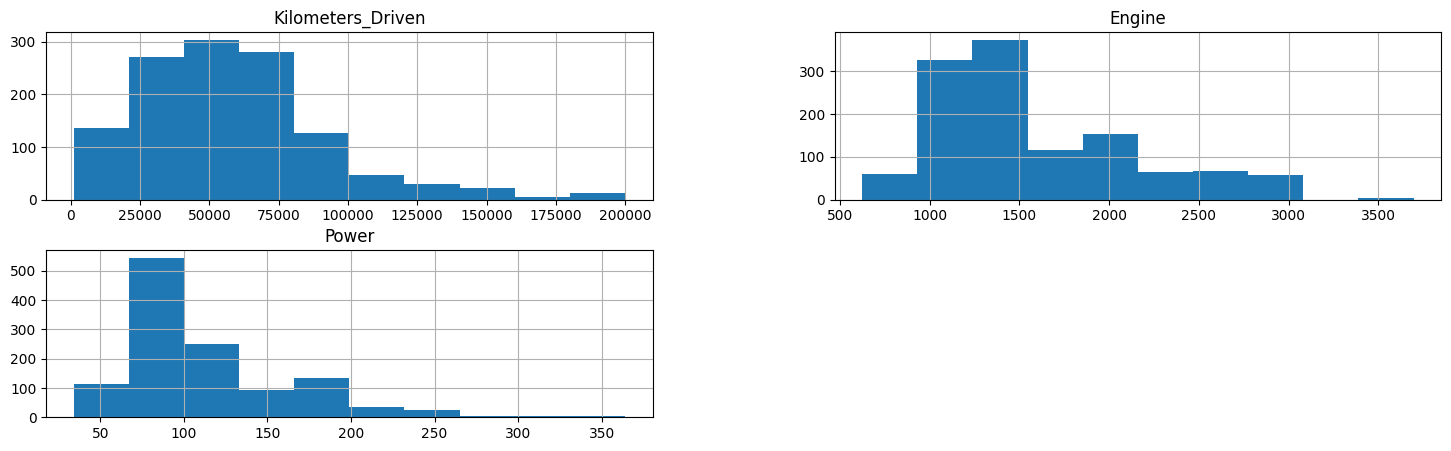

In [ ]:
CarData.hist(["Kilometers_Driven", "Engine", "Power"], figsize=(18,5))

# Observation from Step 11



*   The distribution has improved after the outlier treatment.
*   There is still a tail in the Power and Engine histograms, but it"s thick,
meaning the algorithm has values to learn in that range, so it"s acceptable.



# Step 12: Missing values analysis



*   Missing Values are treated for each column individually. If a column has more than 30% data missing, then it"s not possible to do missing value treatment.
*   There are multiple ways of treating missing values in data.



1.  Deleting the missing value rows if there are only few records
2.  Replace missing values with the MEDIAN value for variables that are continuous.
3.  In case it"s a Categorical variable, then replace the missing values with MODE values.
4.  It is also possible to interpolate the values based on nearby values or business logic.






In [ ]:
# With the isnull() command, its possible to find how many missing values there are for each column.

CarData.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,10


**Observations from Step 12**



*   There are little missing values in this data. Especifically, "Engine", "Power" and "Seats"
*   We will replace the missing values in "Engine" and "Power" with the Median value of their respective columns as they are both continuous variables.
*   Regarding the "Seats" column, its missing values will be replaced with the mode value of the column, as its a Categorical variable.





In [ ]:
CarData["Engine"].fillna(CarData["Engine"].median(), inplace=True)
CarData["Power"].fillna(CarData["Power"].median(), inplace=True)
CarData["Seats"].fillna(CarData["Seats"].mode()[0], inplace=True)

**With the missing values now treated, we will confirm our treatment by finding how many missing values there are for each column now.**

In [ ]:
CarData.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [ ]:
# Check if the "Mileage" column has any zero values
has_zeroes = (CarData["Mileage"] == 0).any()
print(f"The 'Mileage' column has zero values: {has_zeroes}")

# If it does, you can count how many
num_zeroes = (CarData["Mileage"] == 0).sum()
print(f"Number of zero values: {num_zeroes}")

The 'Mileage' column has zero values: True
Number of zero values: 13


In [ ]:
# Calculate the median of the "Mileage" column, ignoring zero values
median_mileage = CarData["Mileage"][CarData["Mileage"] != 0].median()

# Replace zero values with the median
CarData["Mileage"] = CarData["Mileage"].replace(0, median_mileage)

In [ ]:
# Check if the "Mileage" column has any zero values
has_zeroes = (CarData["Mileage"] == 0).any()
print(f"The 'Mileage' column has zero values: {has_zeroes}")

# If it does, you can count how many
num_zeroes = (CarData["Mileage"] == 0).sum()
print(f"Number of zero values: {num_zeroes}")

The 'Mileage' column has zero values: False
Number of zero values: 0


In [ ]:
print(CarData.dtypes)


Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
dtype: object


In [ ]:
# Information on isfinite from the numpy documentation.
# IEEE Reference:

# numpy.isfinite. NumPy Documentation,
# https://numpy.org/doc/stable/reference/generated/numpy.isfinite.html. Accessed Aug. 25, 2024.

import numpy as np

numeric_columns = CarData[["Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats"]]
has_infinite = ~np.isfinite(numeric_columns).any(axis=None)
print(f"The DataFrame has infinite values: {not has_infinite}")

NameError: name 'CarData' is not defined

In [ ]:
# Information on isfinite from the numpy documentation.
# IEEE Reference:

# numpy.isfinite. NumPy Documentation,
# https://numpy.org/doc/stable/reference/generated/numpy.isfinite.html. Accessed Aug. 25, 2024.

import numpy as np

# Select numeric columns
numeric_data = CarData[["Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats"]]

# Get a boolean mask indicating infinite values
infinite_mask = ~np.isfinite(numeric_data)

# Get the indices of rows with infinite values within the numeric subset
rows_with_infinite = infinite_mask.any(axis=1)
print("Rows with infinite values:")
print(numeric_data[rows_with_infinite])

# Get the names of columns with infinite values
cols_with_infinite = infinite_mask.any(axis=0)
print("\nColumns with infinite values:")
print(numeric_data.columns[cols_with_infinite])

Rows with infinite values:
Empty DataFrame
Columns: [Year, Kilometers_Driven, Mileage, Engine, Power, Seats]
Index: []

Columns with infinite values:
Index([], dtype='object')


In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

import numpy as np

# Check the entire DataFrame, but handle non-numeric columns
for col in CarData.columns:
    if CarData[col].dtype in [np.float64, np.int64]:  # Check if column is numeric
        has_infinite_in_col = ~np.isfinite(CarData[col]).any()
        print(f"Column '{col}' has infinite values: {not has_infinite_in_col}")

Column 'Unnamed: 0' has infinite values: True
Column 'Year' has infinite values: True
Column 'Kilometers_Driven' has infinite values: True
Column 'Mileage' has infinite values: True
Column 'Engine' has infinite values: True
Column 'Power' has infinite values: True
Column 'Seats' has infinite values: True


In [ ]:

numeric_data = CarData[["Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats"]]
infinite_mask = ~np.isfinite(numeric_data)
CarData = CarData[~infinite_mask.any(axis=1)]  # Keep rows without infinite values


**Observations from step 12:**

After treating the missing values successfully, there are now no missing values for any category, meaning we can now proceed with the next step.

# Step 13: Feature Selection (Attribute selection)

In this step, the best columns(features) will be chosen that are correlated with the target variable. The relation between the Target variable with the rest of the predictors will be visualized since it provides a better sense of data.

**For this dataset, since the Target variable is continuous, the visualization will focus on two specific scenarios:**

1.   Continuous Target Variable Vs Continuous Predictor (Scatter Charts + Pearson"s Correlation Value method)
2.   Continuous Target Variable Vs Categorical Predictor (Box Plots method)



# Continuous vs Contiunous -- Scatter charts

When the target variable and the predictor is also continuous, we can visualize the relationship between the two variables via a scatter plot; while a Pearson Correlation Value will be used to measure the strength of the relation.

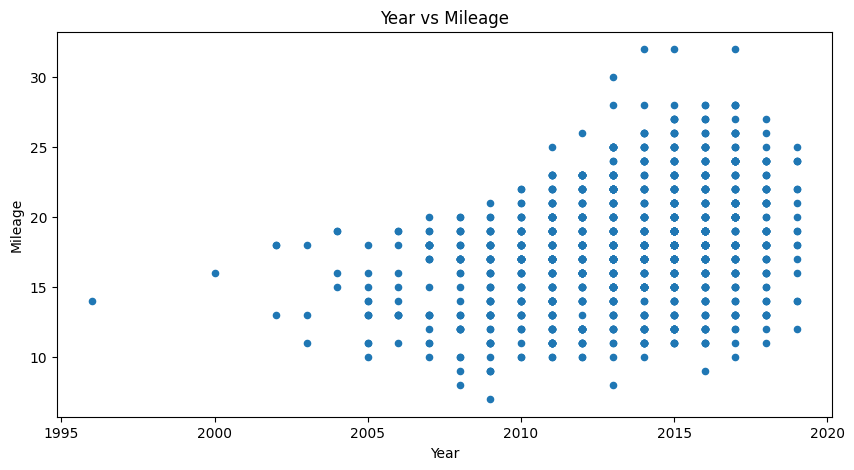

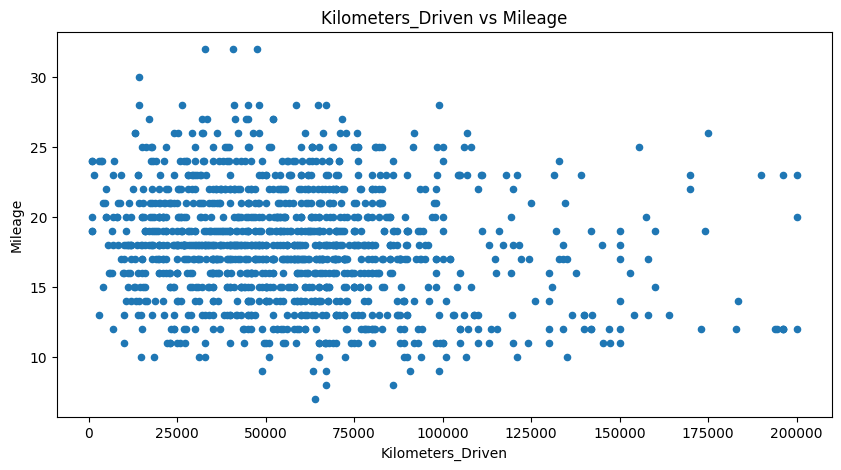

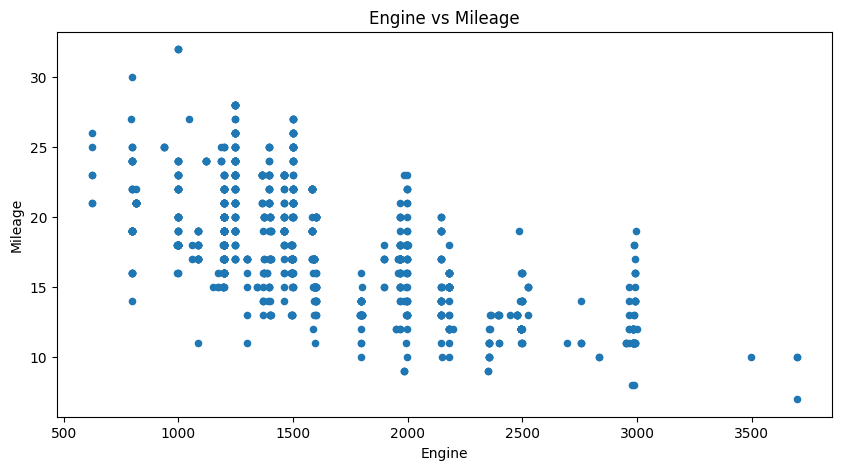

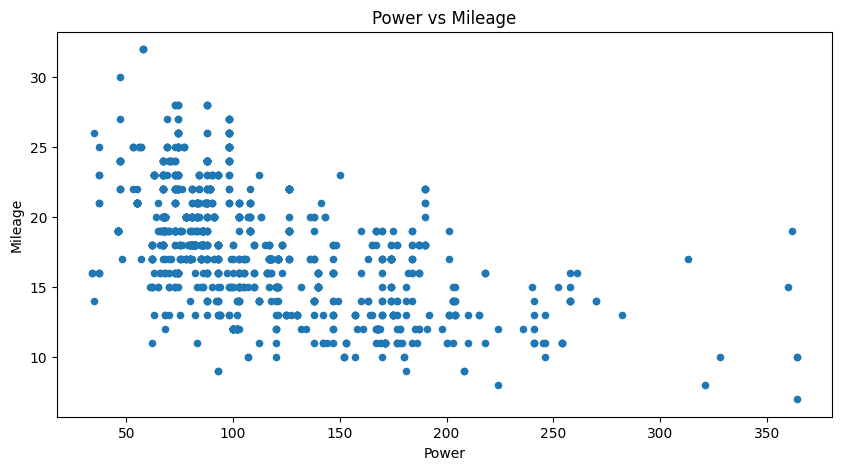

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

ContinuousCols=["Year", "Kilometers_Driven", "Engine", "Power"]

# Plotting scatter chart for each predictor vs target variable.
for predictor in ContinuousCols:
  CarData.plot.scatter(x=predictor, y="Mileage", figsize=(10,5), title=predictor + " vs Mileage")

**Scatter charts interpretation:**

*   **Year vs Mileage: Increasing trend**
*   **Kilometers_Driven vs Mileage: Decreasing trend (Although the scatter and trend is not very strong)**
*   **Engine vs Mileage: Decreasing trend**
*   **Power vs Mileage: Decreasing trend**




# Step 14: Statistical feature Selection (Continuous vs Continuous) using correlation value.

Pearson"s correlation coefficient is a powerful metric for this step. The covariance between two features x and y divided by the product of their standard deviations will provide the correlation.

1.   Correlation between (0,1) means directly proportional  
2.   Correlation between {0} means No relationship, scatter plot will show no clear trend.
3.  If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship, regardless of the sign.



In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Calculating the correlation matrix
ContinuousCols=["Year", "Kilometers_Driven", "Engine", "Power", "Mileage"]

# Creating the correlation matrix
CorrelationData=CarData[ContinuousCols].corr()
CorrelationData

,Year,Kilometers_Driven,Engine,Power,Mileage
Year,1.000000,-0.472090,-0.060583,0.026579,0.314174
Kilometers_Driven,-0.472090,1.000000,0.190898,-0.002917,-0.169046
Engine,-0.060583,0.190898,1.000000,0.812590,-0.639930
Power,0.026579,-0.002917,0.812590,1.000000,-0.532667
Mileage,0.314174,-0.169046,-0.639930,-0.532667,1.000000


In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Filtering only those columns that have a correlation of > 0.5 with the target variable
# If no variable is selected, reduce the 0.5 threshhold.

CorrelationData["Mileage"][abs(CorrelationData["Mileage"])>0.3]

,Mileage
Year,0.314174
Engine,-0.639930
Power,-0.532667
Mileage,1.000000


# Observations from step 14

**Final selected Continuous columns: "Year", "Engine", "Power"**

# Step 15: Relationship Exploration: Categorical vs Continuous -- Box Plots

When the target variable is Continuous and the predictor variables are Categorical, we follow a similar process like the one before. Analize the relation, and proceed with strength of relation measuring.

We will use Boxplots and Anova test for each respectively.

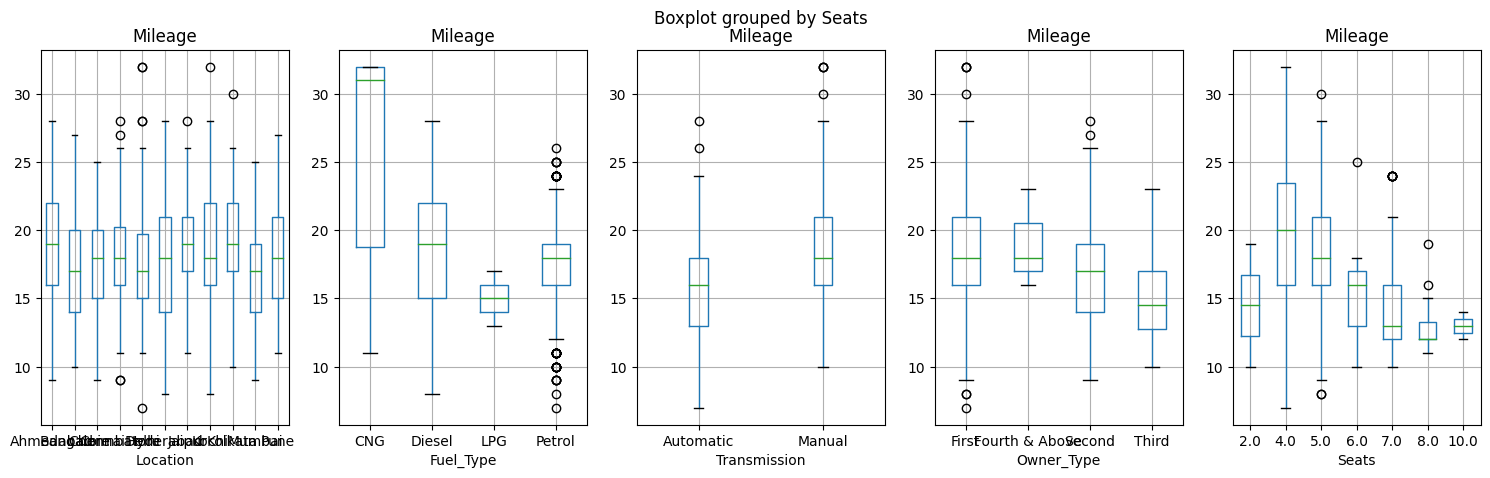

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Box Plots for continuous Target Variable "Mileage" and Categorical predictors
CategoricalColsList=["Location", "Fuel_Type", "Transmission", "Owner_Type", "Seats"]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Mileage"
for PredictorCol, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
  CarData.boxplot(column="Mileage", by=PredictorCol, figsize=(5,5), ax=PlotCanvas[i], vert=True)

**Observation from box plot:**

The analysis suggests that while there are some minor differences in mileage based on diferent factors, the overall variation of mileage is small. The location seems to be the factor that has a more significant impact on mileage, with cars from certain regions tending to have a higher mileage.


# Step 16: Statistical Feature Selection utilizing the ANOVA test.

This test is performed to check if there is any relationship between the given continuous and categorical value.

*   Assumption (H0) Null Hypothesis: There is NO relation between the given variables

The ANOVA test result will confirm the probability of H0 being true.


In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print("##### ANOVA Results ##### \n")
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, "is correlated with", TargetVariable, "| P-Value:", AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, "is NOT correlated with", TargetVariable, "| P-Value:", AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Now, we call the funtion to check which categorical values are corelated with the target.
CategoricalPredictorList=["Location", "Fuel_Type", "Transmission", "Owner_Type", "Seats"]
SelectedPredictors=FunctionAnova(inpData=CarData, TargetVariable="Mileage", CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Location is correlated with Mileage | P-Value: 1.9634713074386077e-05
Fuel_Type is correlated with Mileage | P-Value: 8.962493902527515e-09
Transmission is correlated with Mileage | P-Value: 1.8413421160076066e-33
Owner_Type is correlated with Mileage | P-Value: 3.7047249513058494e-08
Seats is correlated with Mileage | P-Value: 1.303591568999233e-39


## Observations from Step 16

All of the categorical variables ar ecorrelated with the Target Variable, according to the ANOVA results. The final categorical columns are:

"Location", "Fuel_Type", "Transmission", "Owner_Type", "Seats"


**Selecting the final Predictors/Features for building Machine Learning/AI model**

Based on the extensive previous tests with exploratory Data Analysis, the final predictors/columns are:

*   "Location"
*   "Fuel_Type"

*   "Transmission"
*   "Owner_Type"

*   "Seats"
*   "Year"

*   "Engine"
*   "Power








In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

SelectedColumns=["Location", "Fuel_Type", "Transmission", "Owner_Type", "Seats", "Year", "Engine", "Power"]

# Selecting final Columns

DataForML=CarData[SelectedColumns]
DataForML.head()

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Year,Engine,Power
0,Delhi,CNG,Manual,First,4.0,2014,998.0,58.0
1,Coimbatore,Petrol,Manual,Second,5.0,2013,796.0,47.0
2,Mumbai,Diesel,Manual,First,7.0,2017,2393.0,147.0
3,Hyderabad,Diesel,Manual,First,5.0,2012,1364.0,93.0
4,Mumbai,Petrol,Manual,First,5.0,2014,1197.0,82.0


In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Saving this final data subset for reference during deployment
DataForML.to_pickle("DataForML.pkl")

# Step 17: Data Pre-processing for Machine Learning Model Building or Model Development

Before using the data for Machine Learning, the predictor variables need to be processed as follows:

*   Convertion of each ordinal Categorical columns to numeric
*   Convertion of Binary nominal categorial columns to numberic using 1/0 mapping

For all other nominal categorical columns, convert them to numeric using pd.get_dummies()



In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Converting the nominal variable to numeric using get_dummies()

# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric["Mileage"]=CarData["Mileage"]

# Printing sample rows
DataForML_Numeric.head()


,Seats,Year,Engine,Power,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Mileage
0,4.0,2014,998.0,58.0,False,False,False,False,True,False,...,False,False,False,False,True,True,False,False,False,32.0
1,5.0,2013,796.0,47.0,False,False,False,True,False,False,...,False,False,True,False,True,False,False,True,False,24.0
2,7.0,2017,2393.0,147.0,False,False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,13.0
3,5.0,2012,1364.0,93.0,False,False,False,False,False,True,...,True,False,False,False,True,True,False,False,False,23.0
4,5.0,2014,1197.0,82.0,False,False,False,False,False,False,...,False,False,True,False,True,True,False,False,False,18.0


# Step 18: Machine Learning Model Development:

The data is split into training and testing sample to evaluate model performance. Typically, 70% of the data is used for training the model, while the remaining 30% is set aside for testing data.



In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Printing all the column names for reference
DataForML_Numeric.columns



Index(['Seats', 'Year', 'Engine', 'Power', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Mileage'],
      dtype='object')

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

#Separate Target Variable and Predictor Variables
TargetVariable="Mileage"
Predictors=["Seats", "Year", "Engine", "Power", "Location_Ahmedabad", "Location_Bangalore", "Location_Chennai", "Location_Coimbatore", "Location_Delhi", "Location_Hyderabad", "Location_Jaipur", "Location_Kochi", "Location_Kolkata", "Location_Mumbai", "Location_Pune", "Fuel_Type_CNG", "Fuel_Type_Diesel", "Fuel_Type_LPG", "Fuel_Type_Petrol", "Transmission_Automatic", "Transmission_Manual", "Owner_Type_First", "Owner_Type_Fourth & Above", "Owner_Type_Second", "Owner_Type_Third"]

x = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=428)

# Step 19: Standarization/Normalization of data

This step is mostly optional. It is only truly necessary if we are using KNN or Neural Networks. Outside of that, this step helps with comparing the resultant accuracy of the transformed data with the raw data.

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Standarization of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# We choose either standarization or normalization.
# Considering the data we are working with, Min Max Normalization will produce better results.
PredictorScaler = MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(x)
# Generating the standardized values of X
x = PredictorScalerFit.transform(x)
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=428)


In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Sanity check for the sampled data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(863, 25)
(863,)
(371, 25)
(371,)


# Step 20: Multiple Linear Regression Algorithm for ML/AI model building



In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Multiple linear regression.
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
# Printing all of the parameters of the Linear Regression
print(RegModel)

#Creating the model on Training Data
LREG=(RegModel.fit(x_train, y_train))
prediction=LREG.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training Data
print("R2 Value :",metrics.r2_score(y_train, LREG.predict(x_train)))

###########################################################################

print("\n##### Model Validation and Accuracy Calculations ##########")

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[TargetVariable+"_Predicted"]=np.round(prediction) # Column name is "Mileage_Predicted"
# Printing sample prediction values
print(TestingDataResults.head())

#Calculating the error for each row
TestingDataResults["APE"]=100 * ((abs(
  TestingDataResults["Mileage"]-TestingDataResults["Mileage_Predicted"]))/TestingDataResults["Mileage"]) # Use correct column name "Mileage_Predicted"

MAPE = np.mean(TestingDataResults["APE"])
MedianMAPE = np.median(TestingDataResults["APE"])

Accuracy = 100 - MAPE
MedianAccuracy= 100 - MedianMAPE
print("Mean accuracy on test data", Accuracy) # Can be negative sometimes depending on outlier
print("Median accuracy on test data", MedianAccuracy)

# Defining a custom function to calculate the accuracy
# It"s important that there are no zeros in the target variable if using MAPE

def Accuracy_Score(orig, pred, epsilon=1e-10):  # Add a small constant epsilon
  MAPE = np.mean(100 * (np.abs(orig - pred) / (orig + epsilon)))  # Add epsilon to denominator
  return(100 - MAPE)

# Custom scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Importing the cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data on to x and y because the k-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x, y, cv=10, scoring=custom_Scoring)
print("Cross Validation Accuracy")
print("\nAccuracy values for 10-fold Cross Validation:\n",Accuracy_Values)
print("\nFinal Average Accuracy of the model:", round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value : 0.7080833202203982

##### Model Validation and Accuracy Calculations ##########
   Seats      Year    Engine     Power  Location_Ahmedabad  \
0  0.375  0.565217  0.251302  0.200000                 0.0   
1  0.375  0.782609  0.284505  0.166667                 0.0   
2  0.375  0.739130  0.437500  0.321212                 0.0   
3  0.375  0.565217  0.121745  0.096970                 0.0   
4  0.375  0.608696  0.186523  0.133333                 0.0   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                 0.0               0.0                  0.0             0.0   
1                 0.0               1.0                  0.0             0.0   
2                 0.0               0.0                  0.0             0.0   
3                 0.0               1.0                  0.0             0.0   
4                 0.0               0.0                  0.0             0.0   

   Location_Hyderabad  ...  Fuel_Typ

# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.7899554479409787

##### Model Validation and Accuracy Calculations ##########
   Seats      Year    Engine     Power  Location_Ahmedabad  \
0  0.375  0.565217  0.251302  0.200000                 0.0   
1  0.375  0.782609  0.284505  0.166667                 0.0   
2  0.375  0.739130  0.437500  0.321212                 0.0   
3  0.375  0.565217  0.121745  0.096970                 0.0   
4  0.375  0.608696  0.186523  0.133333                 0.0   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                 0.0               0.0                  0.0             0.0   
1                 0.0               1.0                  0.0             0.0   
2                 0.0               0.0                  0.0             0.0   
3                 0.0               1.0                  0.0             0.0   
4                 0.0               0.0                  0.0             0.0

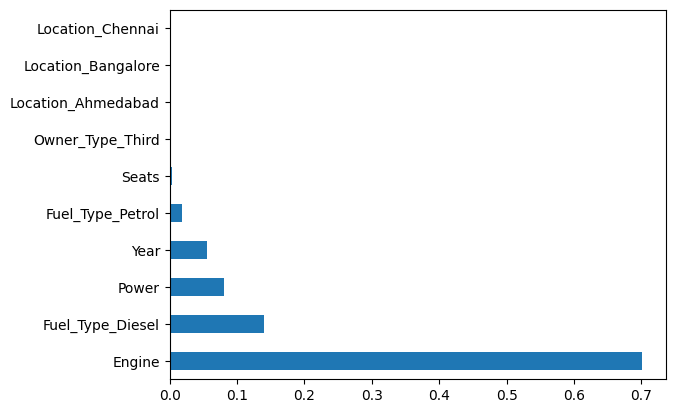

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion="friedman_mse")
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(x_train,y_train)
prediction=DT.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print("R2 Value:",metrics.r2_score(y_train, DT.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind="barh")

###########################################################################
print("\n##### Model Validation and Accuracy Calculations ##########")

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[("Predicted"+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults["APE"]=100 * ((abs(
  TestingDataResults["Mileage"]-TestingDataResults["PredictedMileage"]))/TestingDataResults["Mileage"])

MAPE=np.mean(TestingDataResults["APE"])
MedianMAPE=np.median(TestingDataResults["APE"])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print("Mean Accuracy on test data:", Accuracy) # Can be negative sometimes due to outlier
print("Median Accuracy on test data:", MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print("#"*70,"Accuracy:", 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print("\nAccuracy values for 10-fold Cross Validation:\n",Accuracy_Values)
print("\nFinal Average Accuracy of the model:", round(Accuracy_Values.mean(),2))

# Plotting/Visualising the Decision Tree

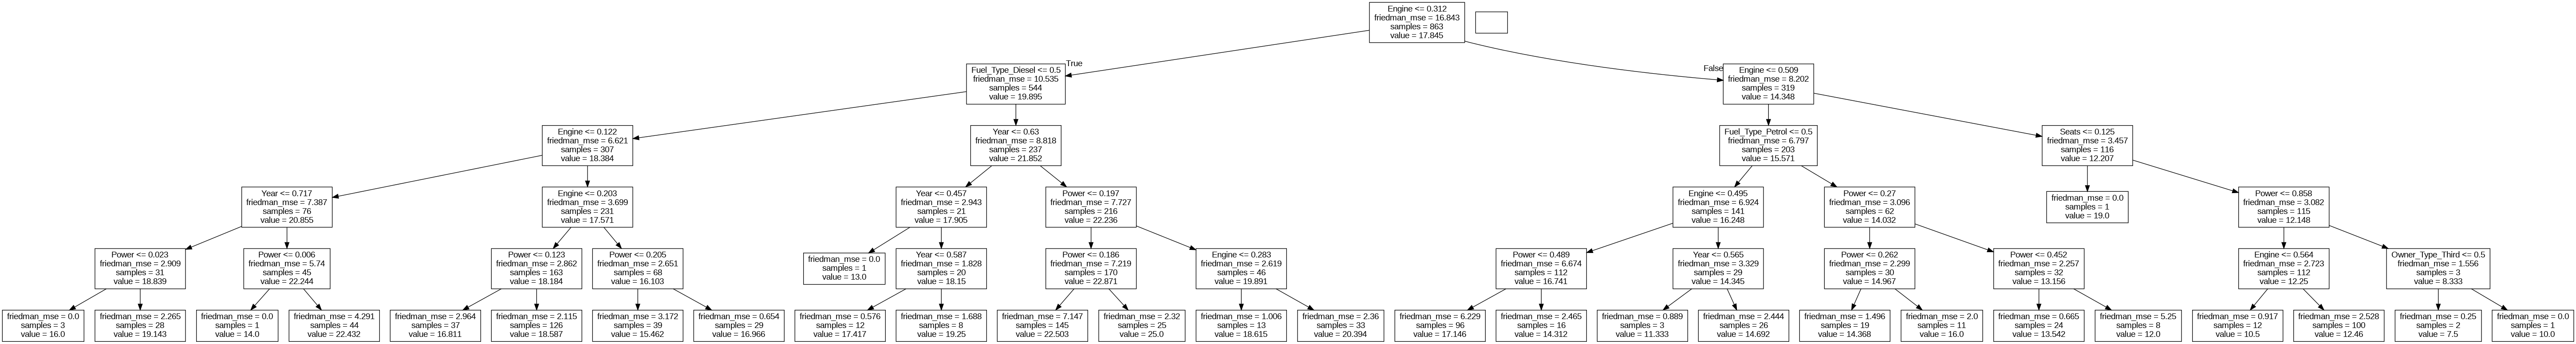

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors) # Remove class_names parameter for regression model

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=3000,height=3000)
# Double click on the graph to zoom in

# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.7646787150539529

##### Model Validation and Accuracy Calculations ##########
   Seats      Year    Engine     Power  Location_Ahmedabad  \
0  0.375  0.565217  0.251302  0.200000                 0.0   
1  0.375  0.782609  0.284505  0.166667                 0.0   
2  0.375  0.739130  0.437500  0.321212                 0.0   
3  0.375  0.565217  0.121745  0.096970                 0.0   
4  0.375  0.608696  0.186523  0.133333                 0.0   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                 0.0               0.0                  0.0             0.0   
1                 0.0               1.0                  0.0             0.0   
2                 0.0               0.0                  0.0             0.0   
3                 0.0               1.0                  0.0             0.0   
4                 0.0               0.0                  0

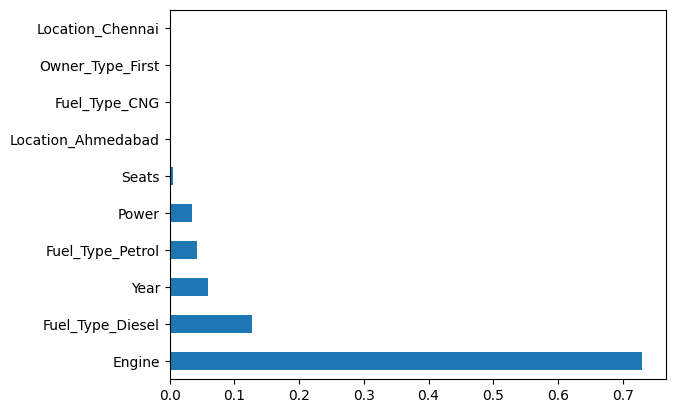

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion="friedman_mse")
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(x_train,y_train)
prediction=RF.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print("R2 Value:",metrics.r2_score(y_train, RF.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind="barh")

###########################################################################
print("\n##### Model Validation and Accuracy Calculations ##########")

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[("Predicted"+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults["APE"]=100 * ((abs(
  TestingDataResults["Mileage"]-TestingDataResults["PredictedMileage"]))/TestingDataResults["Mileage"])

MAPE=np.mean(TestingDataResults["APE"])
MedianMAPE=np.median(TestingDataResults["APE"])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print("Mean Accuracy on test data:", Accuracy) # Can be negative sometimes due to outlier
print("Median Accuracy on test data:", MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print("#"*70,"Accuracy:", 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x, y, cv=10, scoring=custom_Scoring)
print("\nAccuracy values for 10-fold Cross Validation:\n",Accuracy_Values)
print("\nFinal Average Accuracy of the model:", round(Accuracy_Values.mean(),2))

# Plotting One of the Decision Tree in Random Forest Regressor

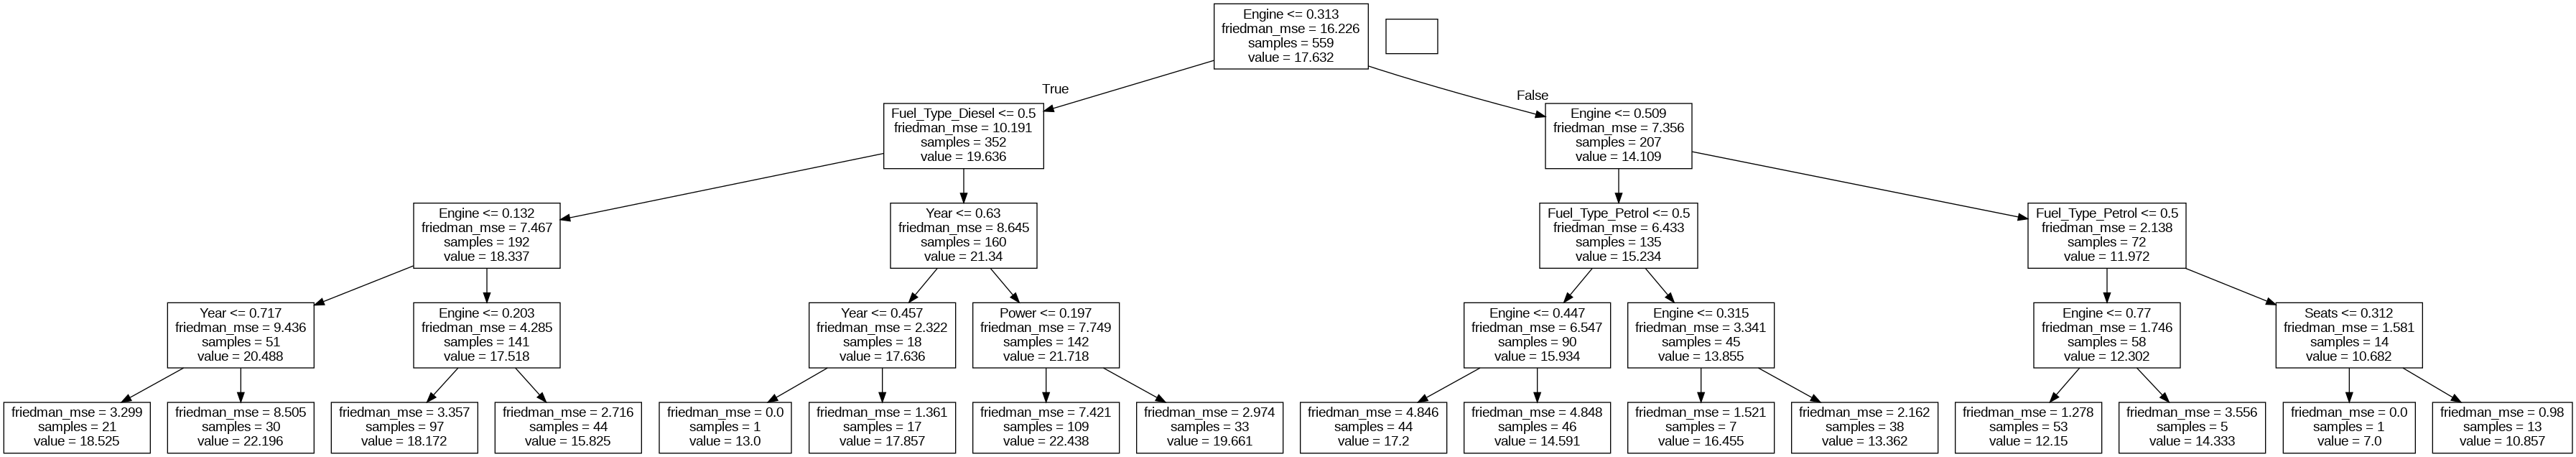

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None,
                                feature_names=Predictors)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

## Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Value: 0.7009267950631426

##### Model Validation and Accuracy Calculations ##########
   Seats      Year    Engine     Power  Location_Ahmedabad  \
0  0.375  0.565217  0.251302  0.200000                 0.0   
1  0.375  0.782609  0.284505  0.166667                 0.0   
2  0.375  0.739130  0.437500  0.321212                 0.0   
3  0.375  0.565217  0.121745  0.096970                 0.0   
4  0.375  0.608696  0.186523  0.133333                 0.0   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                 0.0               0.0                  0.0             0.0   
1                 0.0               1.0                  0.0             0.0   
2                 0.0               0.0                  0.0             0.0   
3                 0.0               1.0                  0.0             0.0   
4                 0.0               0.0                  0.0             0.0   

   Location_Hyderabad  ...  Fuel_Type_LPG  Fuel_Type_Pet

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Accuracy values for 10-fold Cross Validation:
 [90.13119596 89.3369559  89.40339295 88.33626628 90.32636024 89.46302318
 90.16292528 87.9723898  89.73847297 87.87951397]

Final Average Accuracy of the model: 89.28


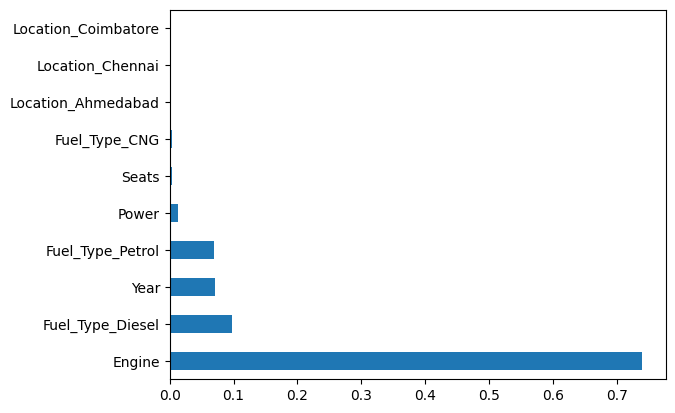

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(x_train,y_train)
prediction=AB.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print("R2 Value:",metrics.r2_score(y_train, AB.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind="barh")

###########################################################################
print("\n##### Model Validation and Accuracy Calculations ##########")

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[("Predicted"+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults["APE"]=100 * ((abs(
  TestingDataResults["Mileage"]-TestingDataResults["PredictedMileage"]))/TestingDataResults["Mileage"])

MAPE=np.mean(TestingDataResults["APE"])
MedianMAPE=np.median(TestingDataResults["APE"])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print("Mean Accuracy on test data:", Accuracy) # Can be negative sometimes due to outlier
print("Median Accuracy on test data:", MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print("#"*70,"Accuracy:", 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x, y, cv=10, scoring=custom_Scoring)
print("\nAccuracy values for 10-fold Cross Validation:\n",Accuracy_Values)
print("\nFinal Average Accuracy of the model:", round(Accuracy_Values.mean(),2))

# XGBoost Regressor


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:00:13] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R2 Value: 0.905454701788969

##### Model Validation and Accuracy Calculations ##########
   Seats      Year    Engine     Power  Location_Ahmedabad  \
0  0.375  0.565217  0.251302  0.200000                 0.0   
1  0.375  0.782609  0.284505  0.166667                 0.0   
2  0.375  0.739130  0.437500  0.321212                 0.0   
3  0.375  0.565217  0.121745  0.096970                 0.0   
4  0.375  0.608696  0.186523  0.133333                 0.0   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                 0.0               0.0                  0.0             0.0   
1                 0.0               1.0                  0.0             0.0   
2                 0.0               0.0                  0.0             0.0   
3                 0.0               1.0                  0.0             0.0   
4                 0.0               0.0                  0.0             0.0   

   Location_Hyderabad  ...  Fuel_Type_LPG  Fuel_Type_Petr

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:00:13] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:00:14] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:00:15] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



Accuracy values for 10-fold Cross Validation:
 [92.06245573 91.81253523 91.88696648 91.59362438 92.35362967 93.22173849
 93.12910575 91.67220804 93.4978314  91.63047224]

Final Average Accuracy of the model: 92.29


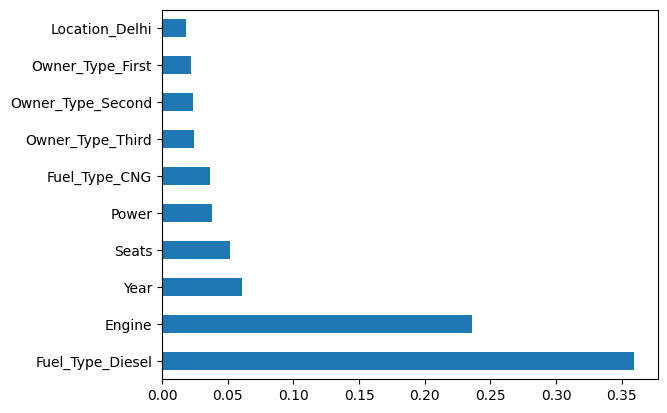

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective="reg:linear",
                      booster="gbtree")

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(x_train,y_train)
prediction=XGB.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print("R2 Value:",metrics.r2_score(y_train, XGB.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind="barh")
###########################################################################
print("\n##### Model Validation and Accuracy Calculations ##########")

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[("Predicted"+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults["APE"]=100 * ((abs(
  TestingDataResults["Mileage"]-TestingDataResults["PredictedMileage"]))/TestingDataResults["Mileage"])


MAPE=np.mean(TestingDataResults["APE"])
MedianMAPE=np.median(TestingDataResults["APE"])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print("Mean Accuracy on test data:", Accuracy) # Can be negative sometimes due to outlier
print("Median Accuracy on test data:", MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print("#"*70,"Accuracy:", 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x, y, cv=10, scoring=custom_Scoring)
print("\nAccuracy values for 10-fold Cross Validation:\n",Accuracy_Values)
print("\nFinal Average Accuracy of the model:", round(Accuracy_Values.mean(),2))

#Plotting a single Decision tree out of XGBoost

<Axes: >

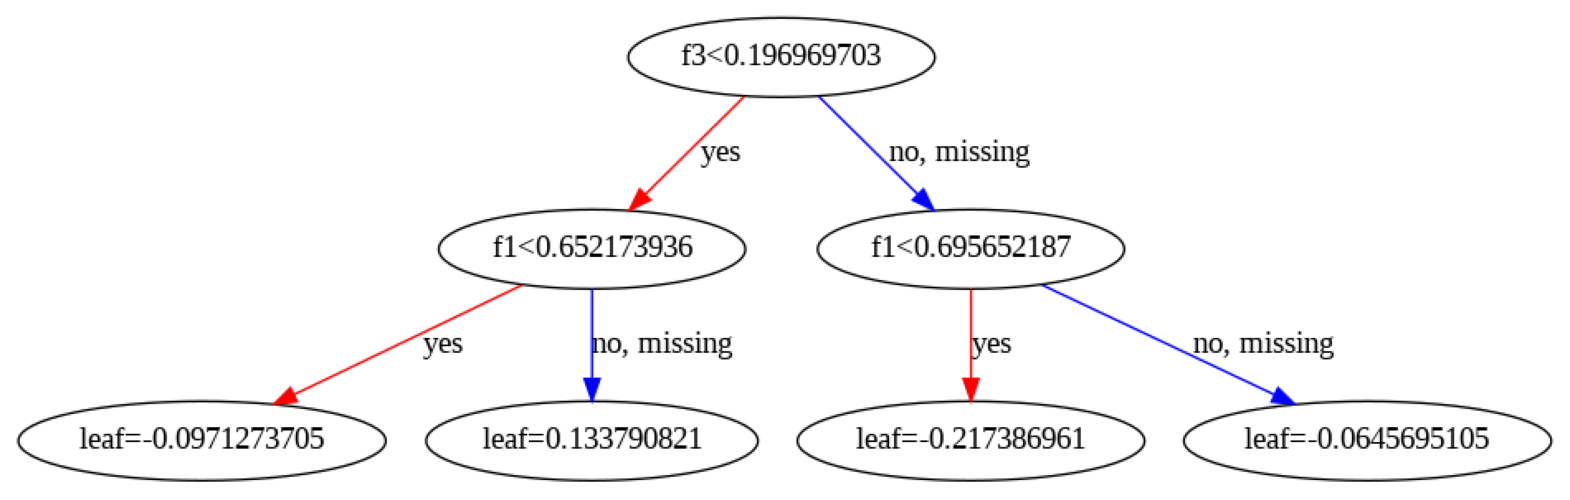

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# K-Nearest Neighbor(KNN)

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(x_train,y_train)
prediction=KNN.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults["Mileage"]-TestingDataResults["PredictedMileage"]))/TestingDataResults["Mileage"])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.7766188054923463

##### Model Validation and Accuracy Calculations ##########
   Seats      Year    Engine     Power  Location_Ahmedabad  \
0  0.375  0.565217  0.251302  0.200000                 0.0   
1  0.375  0.782609  0.284505  0.166667                 0.0   
2  0.375  0.739130  0.437500  0.321212                 0.0   
3  0.375  0.565217  0.121745  0.096970                 0.0   
4  0.375  0.608696  0.186523  0.133333                 0.0   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                 0.0               0.0                  0.0             0.0   
1                 0.0               1.0                  0.0             0.0   
2                 0.0               0.0                  0.0             0.0   
3                 0.0               1.0                  0.0             0.0   
4                 0.0               0.0                  0.0             0.0   

   Location_Hyderabad

# Support Vector Machine (SVM) Regressor

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(x_train,y_train)
prediction=SVM.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults["Mileage"]-TestingDataResults["PredictedMileage"]))/TestingDataResults["Mileage"])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.7033825941881684

##### Model Validation and Accuracy Calculations ##########
   Seats      Year    Engine     Power  Location_Ahmedabad  \
0  0.375  0.565217  0.251302  0.200000                 0.0   
1  0.375  0.782609  0.284505  0.166667                 0.0   
2  0.375  0.739130  0.437500  0.321212                 0.0   
3  0.375  0.565217  0.121745  0.096970                 0.0   
4  0.375  0.608696  0.186523  0.133333                 0.0   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                 0.0               0.0                  0.0             0.0   
1                 0.0               1.0                  0.0             0.0   
2                 0.0               0.0                  0.0             0.0   
3                 0.0               1.0                  0.0             0.0   
4                 0.0               0.0                  0.0             0.0   

   Location_Hyderabad  ...  Fuel_T

# Step 21: Model Deployment

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Separate Target Variable and Predictor Variables
TargetVariable="Mileage"

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors = ['Seats', 'Year', 'Engine', 'Power',
              'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
              'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
              'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
              'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
              'Transmission_Automatic', 'Transmission_Manual']

# Verify if 'DataForML_Numeric' contains the required columns
print(DataForML_Numeric.columns)

# If the columns are missing, you need to revisit your data preprocessing steps to create them.
# If the columns are present, check if you are using the correct DataFrame.

# Proceed with extracting values once the issue is resolved
x=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values


### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)

# Generating the standardized values of X
x=PredictorScalerFit.transform(x)

print(x.shape)
print(y.shape)

Index(['Seats', 'Year', 'Engine', 'Power', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Mileage'],
      dtype='object')
(1234, 21)
(1234,)


# Cross validating the final model accuracy with less predictors

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:00:49] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:00:50] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:00:51] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



Accuracy values for 10-fold Cross Validation:
 [91.9650857  91.9849785  91.87269293 91.82019686 92.28788974 93.35111684
 93.05538409 91.67773663 93.52305609 91.52321695]

Final Average Accuracy of the model: 92.31


# Step 22: Retraining the final model using 100% data

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(x,y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:00:54] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


# Step 23: Save the model as a serialized file which can be stored anywhere

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


# Step 24: Create a python function

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # DO NOT append the new data with the Training data
    # Instead, process the new input data separately
    #DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    #InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors = ['Seats', 'Year', 'Engine', 'Power',
              'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
              'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
              'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
              'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
              'Transmission_Automatic', 'Transmission_Manual']

    # Generating the input values to the model
    x=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    x=PredictorScalerFit.transform(x)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(x)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Step 25: Calling the function for some new data

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

# Sample data for all 21 columns
NewSampleData = pd.DataFrame(data=[
    [5, 2019, 1500, 95, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # Sample 1
    [7, 2022, 1200, 80, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]   # Sample 2
], columns=['Seats', 'Year', 'Engine', 'Power', 'Location_Ahmedabad',
            'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
            'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
            'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
            'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
            'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic',
            'Transmission_Manual'])

print(NewSampleData)

   Seats  Year  Engine  Power  Location_Ahmedabad  Location_Bangalore  \
0      5  2019    1500     95                   1                   0   
1      7  2022    1200     80                   0                   1   

   Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  \
0                 0                    0               0                   0   
1                 0                    0               0                   0   

   ...  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0  ...               0                 0                0              0   
1  ...               0                 0                0              0   

   Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              0                 1              0                 0   
1              0                 0              0                 1   

   Transmission_Automatic  Transmission_Manual  
0                       1                    0 

# Deploying the model with few parameters
# Function for predictions API

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

def FunctionGeneratePrediction(inp_Seats, inp_Year, inp_Engine, inp_Power, inp_Location_Ahmedabad,
                                inp_Location_Bangalore, inp_Location_Chennai, inp_Location_Coimbatore,
                                inp_Location_Delhi, inp_Location_Hyderabad, inp_Location_Jaipur,
                                inp_Location_Kochi, inp_Location_Kolkata, inp_Location_Mumbai,
                                inp_Location_Pune, inp_Fuel_Type_CNG, inp_Fuel_Type_Diesel,
                                inp_Fuel_Type_LPG, inp_Fuel_Type_Petrol, inp_Transmission_Automatic,
                                inp_Transmission_Manual):

    # Creating a data frame for the model input
    SampleInputData = pd.DataFrame(
        data=[[inp_Seats, inp_Year, inp_Engine, inp_Power, inp_Location_Ahmedabad,
               inp_Location_Bangalore, inp_Location_Chennai, inp_Location_Coimbatore,
               inp_Location_Delhi, inp_Location_Hyderabad, inp_Location_Jaipur,
               inp_Location_Kochi, inp_Location_Kolkata, inp_Location_Mumbai,
               inp_Location_Pune, inp_Fuel_Type_CNG, inp_Fuel_Type_Diesel,
               inp_Fuel_Type_LPG, inp_Fuel_Type_Petrol, inp_Transmission_Automatic,
               inp_Transmission_Manual]],
        columns=['Seats', 'Year', 'Engine', 'Power', 'Location_Ahmedabad',
                 'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
                 'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
                 'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
                 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
                 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic',
                 'Transmission_Manual'])

    # Calling the function defined above using the input parameters
    Predictions = FunctionPredictResult(InputData=SampleInputData)

    # Returning the predictions
    return Predictions.to_json()

# Function call
FunctionGeneratePrediction(inp_Seats=5,
                           inp_Year=2019,
                           inp_Engine=1500,
                           inp_Power=95,
                           inp_Location_Ahmedabad=1,
                           inp_Location_Bangalore=0,
                           inp_Location_Chennai=0,
                           inp_Location_Coimbatore=0,
                           inp_Location_Delhi=0,
                           inp_Location_Hyderabad=0,
                           inp_Location_Jaipur=0,
                           inp_Location_Kochi=0,
                           inp_Location_Kolkata=0,
                           inp_Location_Mumbai=0,
                           inp_Location_Pune=0,
                           inp_Fuel_Type_CNG=0,
                           inp_Fuel_Type_Diesel=1,
                           inp_Fuel_Type_LPG=0,
                           inp_Fuel_Type_Petrol=0,
                           inp_Transmission_Automatic=1,
                           inp_Transmission_Manual=0)


'{"Prediction":{"0":22.8584003448}}'

# Web Deployment using Flask Library/Package
# Installing the flask library required to create the API


In [ ]:
!pip install flask

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

from flask import Flask, request
import pandas as pd

app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the parameters from API call
        Seats_value = float(request.args.get("Seats"))
        Year_value = float(request.args.get("Year"))
        Engine_value = float(request.args.get("Engine"))
        Power_value = float(request.args.get("Power"))
        Location_Ahmedabad_value = float(request.args.get("Location_Ahmedabad"))
        Location_Bangalore_value = float(request.args.get("Location_Bangalore"))
        Location_Chennai_value = float(request.args.get("Location_Chennai"))
        Location_Coimbatore_value = float(request.args.get("Location_Coimbatore"))
        Location_Delhi_value = float(request.args.get("Location_Delhi"))
        Location_Hyderabad_value = float(request.args.get("Location_Hyderabad"))
        Location_Jaipur_value = float(request.args.get("Location_Jaipur"))
        Location_Kochi_value = float(request.args.get("Location_Kochi"))
        Location_Kolkata_value = float(request.args.get("Location_Kolkata"))
        Location_Mumbai_value = float(request.args.get("Location_Mumbai"))
        Location_Pune_value = float(request.args.get("Location_Pune"))
        Fuel_Type_CNG_value = float(request.args.get("Fuel_Type_CNG"))
        Fuel_Type_Diesel_value = float(request.args.get("Fuel_Type_Diesel"))
        Fuel_Type_LPG_value = float(request.args.get("Fuel_Type_LPG"))
        Fuel_Type_Petrol_value = float(request.args.get("Fuel_Type_Petrol"))
        Transmission_Automatic_value = float(request.args.get("Transmission_Automatic"))
        Transmission_Manual_value = float(request.args.get("Transmission_Manual"))

        # Calling the function to get predictions
        prediction_from_api = FunctionGeneratePrediction(
            inp_Seats=Seats_value,
            inp_Year=Year_value,
            inp_Engine=Engine_value,
            inp_Power=Power_value,
            inp_Location_Ahmedabad=Location_Ahmedabad_value,
            inp_Location_Bangalore=Location_Bangalore_value,
            inp_Location_Chennai=Location_Chennai_value,
            inp_Location_Coimbatore=Location_Coimbatore_value,
            inp_Location_Delhi=Location_Delhi_value,
            inp_Location_Hyderabad=Location_Hyderabad_value,
            inp_Location_Jaipur=Location_Jaipur_value,
            inp_Location_Kochi=Location_Kochi_value,
            inp_Location_Kolkata=Location_Kolkata_value,
            inp_Location_Mumbai=Location_Mumbai_value,
            inp_Location_Pune=Location_Pune_value,
            inp_Fuel_Type_CNG=Fuel_Type_CNG_value,
            inp_Fuel_Type_Diesel=Fuel_Type_Diesel_value,
            inp_Fuel_Type_LPG=Fuel_Type_LPG_value,
            inp_Fuel_Type_Petrol=Fuel_Type_Petrol_value,
            inp_Transmission_Automatic=Transmission_Automatic_value,
            inp_Transmission_Manual=Transmission_Manual_value
        )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine

In [ ]:
#This code is based on the Machine Learning project template by our professor.
#IEEE Reference:
#Kaur, G (2024) BostonHousPriceProject_Final.ipynb (Version 1.0)
#https://uclearn.canberra.edu.au/courses/16243/pages/week-11-project-assignment-workshop?module_item_id=1257929

import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


'''
Sample URL to call the API
Copy and paste below URL in the web browser
http://127.0.0.1:9000/predict?Seats=5&Year=2014&Engine=1200&Power=90&Location_Ahmedabad=0&Location_Bangalore=1&Location_Chennai=0&Location_Coimbatore=0&Location_Delhi=0&Location_Hyderabad=0&Location_Jaipur=0&Location_Kochi=0&Location_Kolkata=0&Location_Mumbai=0&Location_Pune=0&Fuel_Type_CNG=0&Fuel_Type_Diesel=0&Fuel_Type_LPG=0&Fuel_Type_Petrol=1&Transmission_Automatic=0&Transmission_Manual=1&Owner_Type_First=1&Owner_Type_Fourth_Above=0&Owner_Type_Second=0&Owner_Type_Third=0
